In [1]:
from src.stitching.kmm import kmm_thinning
from src.stitching.morphorogical_skeletonization import morphological_skeletonization
from src.improvement.connect_broken_fingerprint_ridges import connect_broken_fingerprint_ridges
from src.detect_minutiae.detect_minutiae import detect_minutiae,draw_minutiae
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
param_morph_threshold = 110 # Próg binaryzacji
param_morph_kernel_type = 'cross' # 'cross' lub 'square'

# Dla connect_broken_fingerprint_ridges
param_connect_closing_kernel = 5
param_connect_bridge_dilate_kernel = 3
param_connect_bridge_erode_kernel = 3
param_connect_bridge_iterations = 1
param_connect_final_thinning = True # Czy próbować ponownie ścienić po połączeniu

# Dla detect_minutiae
param_minutiae_border_margin = 15

# Dla draw_minutiae
param_draw_show_labels = True
param_draw_marker_radius = 4
param_draw_font_scale = 0.35
param_draw_line_thickness = 1
# --- Koniec parametrów ---

In [3]:


def test_kmm_thinning(input_path, output_path, apply_preprocessing=False, apply_postprocessing=False):
    """
    Test function to demonstrate the KMM thinning algorithm.

    Args:
        input_path (str): Path to the input image
        output_path (str): Path to save the output image
        apply_preprocessing (bool): Whether to apply preprocessing techniques
        apply_postprocessing (bool): Whether to apply postprocessing techniques
    """
    kmm_thinning(
        input_path, 
        output_path, 
        apply_preprocessing=apply_preprocessing, 
        apply_postprocessing=apply_postprocessing
    )
    print(f"Thinned image saved to {output_path}")

def test_kmm_with_enhancements(input_path, output_path):
    """
    Test function to demonstrate the KMM thinning algorithm with morphological enhancements.

    Args:
        input_path (str): Path to the input image
        output_path (str): Path to save the output image
    """
    # Define preprocessing parameters
    preprocessing_params = {
        'noise_removal': True,
        'dilation': True,
        'kernel_size': 3
    }

    # Define postprocessing parameters
    postprocessing_params = {
        'closing': True,
        'bridging': True,
        'kernel_size': 3,
        'directional_closing': False,

    }

    # Apply KMM thinning with enhancements
    kmm_thinning(
        input_path, 
        output_path, 
        apply_preprocessing=False,
        apply_postprocessing=True,
        preprocessing_params=preprocessing_params,
        postprocessing_params=postprocessing_params
    )
    print(f"Enhanced thinned image saved to {output_path}")






Enhanced thinned image saved to data/example2_thinned_enhanced.bmp


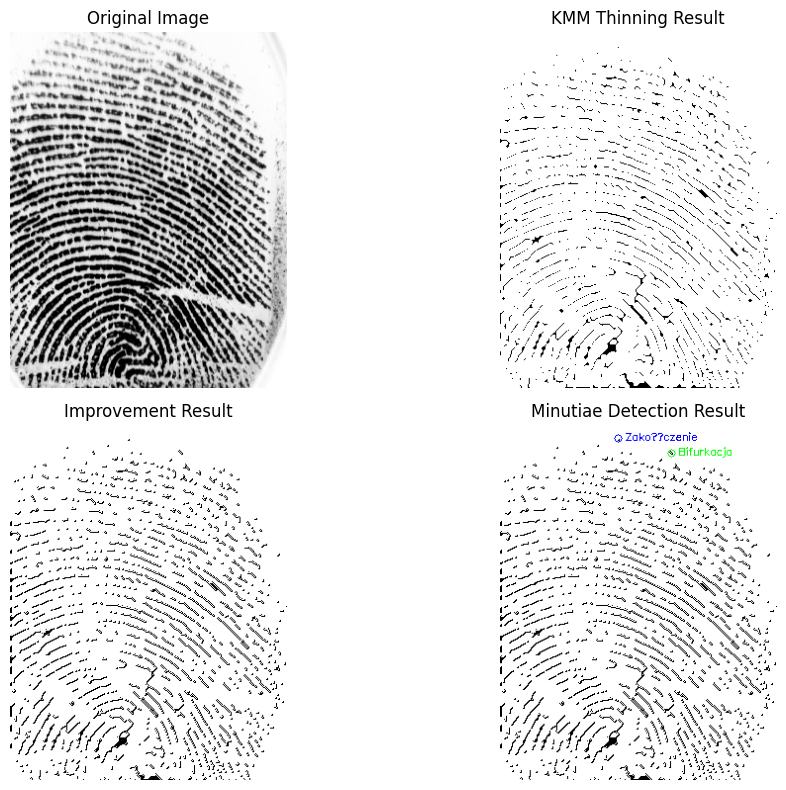

In [4]:
test_image = cv2.imread("data/example2.bmp", cv2.IMREAD_GRAYSCALE)
test_kmm_with_enhancements("data/example2.bmp", "data/example2_thinned_enhanced.bmp")
kmm_result= cv2.imread("data/example2_thinned_enhanced.bmp", cv2.IMREAD_GRAYSCALE)
improvement_result = connect_broken_fingerprint_ridges(kmm_result)
data_minutiae = detect_minutiae(improvement_result)
# Draw detected minutiae on the image
resut_minutiae = draw_minutiae(improvement_result, data_minutiae)

#print original, kmm result, improvement result and minutiae result
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(kmm_result, cmap='gray')
plt.title('KMM Thinning Result')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(improvement_result, cmap='gray')
plt.title('Improvement Result')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()

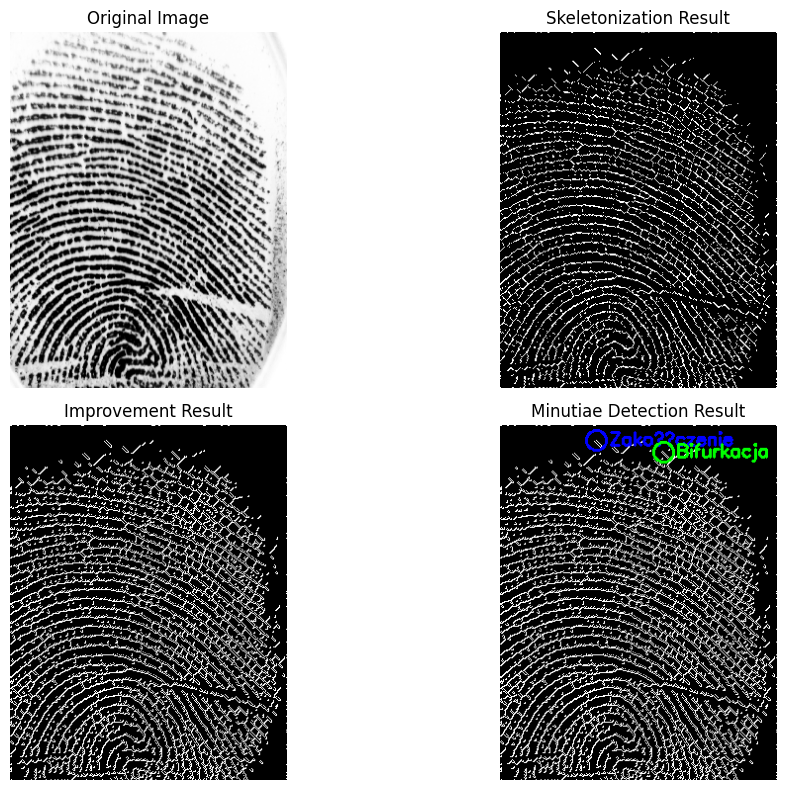

In [5]:
test_image = cv2.imread("data/example2.bmp", cv2.IMREAD_GRAYSCALE)
skeleton_result = morphological_skeletonization(test_image,100)

improvement_result = connect_broken_fingerprint_ridges(skeleton_result)

data_minutiae = detect_minutiae(improvement_result,border_margin=10,select_one_of_each_type=True)
# Draw detected minutiae on the image
resut_minutiae = draw_minutiae(improvement_result, data_minutiae,show_labels=True,marker_radius=10,font_scale=0.6, line_thickness=2)

#print original, skeleton result, improvement result and minutiae result
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(skeleton_result, cmap='gray')
plt.title('Skeletonization Result')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(improvement_result, cmap='gray')
plt.title('Improvement Result')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()

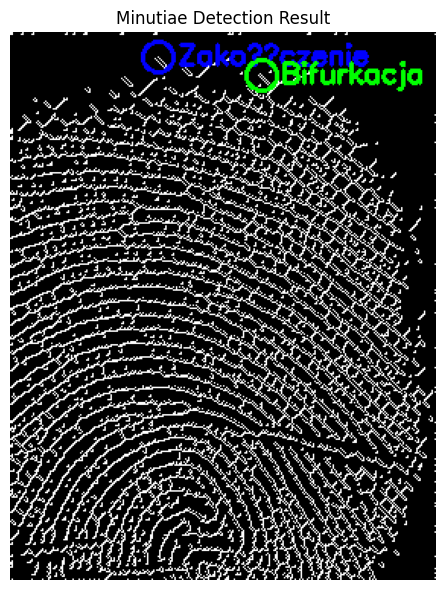

In [6]:
#show resut_minutiae
plt.figure(figsize=(6, 6))
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()